# Decision Trees and Random Forests #

Decision Trees and Random Forests are powerful and easy-to-comprehend ML algorithms that are ideal for classification problems (as we will see later on, they are also useful for regression problems). Decision Trees are built on the same premises that we use in everday life to make decisions such as "should I study for CSC 432 this weekend?" As you consider this question, you are likely internally processing things like your current grade, whether there are any major projects due, if there are any Eagle's home games, and whether you have a date. You could map out all the possible answers to these questions and arrange them in a tree. This decision tree would help you decide on weekend plans.

The Decision Tree ML Algorithm constructs a tree by repeatedly finding decision points that separate classification samples the best, one feature at a time. The algorithm goes through a series of growing and pruning steps to create a tree that balances memory usage, run time, precision, and recall. One such tree is shown below:

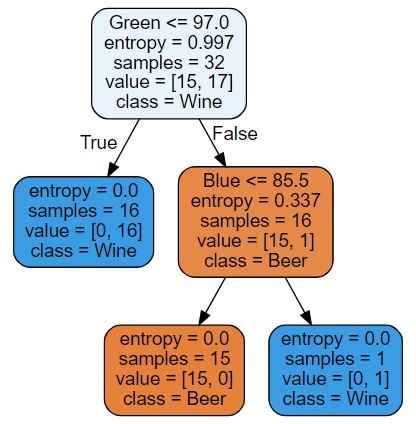

While you or I might be able to look at a dataset and quickly identify the optimal decision points, the computer cannot. Instead, the computer must test a variety of features with random threshold values, and choose a decision point that optimally divides the dataset. There are three important points to be made about this algorithm:
* Decision Trees will be constructed differently each time based on a random seed.
* The algorithm is considered greedy because it focuses on maximizing the immediate decision and is unable to consider choices that have long term benefit for short term costs.
* Decision Trees are prone to overfitting because the decision points can be highly customized.

Random Forests are an Ensemble Learning Algorithm that overcome the limitations of Decision Tree Models at the expense of computational time. Random Forests simply create many Decision Trees (usually in the hundreds), each with a different train/test split. As you no doubt noticed, the name *Random Forests* is a play on name *Decision Tree*. The final step in a Random Forest is to aggregate the results of all the Decision Trees to find an optimal model.

### References: ###
* [A Guide to Decision Trees for Machine Learning and Data Science by George Seif](https://towardsdatascience.com/a-guide-to-decision-trees-for-machine-learning-and-data-science-fe2607241956)
* [Random Forests Algorithm explained with a real-life example and some Python code by Carolina Bento](https://towardsdatascience.com/random-forests-algorithm-explained-with-a-real-life-example-and-some-python-code-affbfa5a942c)
* [Entropy: How Decision Trees Make Decisions by Sam T](https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8)
* [A Simple Explanation of Gini Impurity by Victor Zhou](https://victorzhou.com/blog/gini-impurity/)
* [Optimising a Machine Learning Model with the Confusion Matrix by Rebecca Vickery](https://towardsdatascience.com/understanding-the-confusion-matrix-and-its-business-applications-c4e8aaf37f42)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

600## Loading the Dataset ##

We'll continue to use the Beverage Dataset created by CUI alumn Marius. Here is a refresher on his data:

> A former CUI mathematician and waterpolo player, Marius, created a beverage classifier as part of his senior research project. Marius wrote a KNN classifier that would predict whether a drink was beer or wine based on its color and alcohol content.
>
> Data collection was one of the hardest parts of this beverage classifier project. Marius used a small camera-like device called a colorimeter to measure the color of each drink. The color readings were given in 24-bit hex values that represented the RGB components of each color. Marius obtained the alcohol content by reading the nutrition information on each beverage's package label.
>
> Early on in the project, Marius discovered that his model gave inaccurate predictions. He correctly diagnosed the problem by manually looking up the color of each beverage. Marius found that the RGB values he had recorded did not look like the color of the drinks. The problem was that he had measured the color of each beverage at different times of the day under different lighting conditions. To make matters worse, the beverages were translucent in color and whatever was behind the drink would tint its image. Marius re-measured all of the colors and his results improved significantly.

In [2]:
df = pd.read_csv('drink_data_from_marius.csv')

## Train/Test Split ##

Supervised learning algorithms require you to divide the labeled data into two sets: the training set and the test set. The training set will be used find patterns in the data and create a model. The test data will be used to evaluate the accuracy of the model. Usually the training set is much bigger than the test set.

Once you set some of the data aside for testing, you cannotuse it to tune the model. Any and all tuning must be performed using only the training data. Once you are satisified that the model is of sufficient quality, then you test it. If you are unhappy with the test results, then you must gather new test data before going back and retuning the model.

**Note:** We're going to find that Random Forests doesn't actually require a train/test split.

In [3]:
from sklearn.model_selection import train_test_split

# Remember, we are ignoring alcolhol content because it requires
# access to the beverage label which also identifies the drink

X = df[["Red", "Green", "Blue"]]
y = df["Type"]

# Random state 6 was the same split that we used with KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)

print(f"Training Data:   {X_train.shape}")
print(f"Training Labels: {y_train.shape}")
X_train.head()

Training Data:   (32, 3)
Training Labels: (32,)


,Red,Green,Blue
19,189,40,3
0,172,68,7
30,125,17,6
24,155,67,41
23,242,129,96


## Scaling the Data ##

Scaling is required for K-Nearest Neighbors since it is a distance-based algorithm. Remember that we train the scaler on the training data and then transform all future data with the same operations. The future data will include test data and true predictions.

You'll often see people fit a scalar to the entire data. This isn't too horrible, although it allows for some leakage of test information which can lead to overfitting. Of all the possible ML blunders to make, scaling to the entire data is one that typically has milder consequences.

**Note:** Tree-based algorithms do not require scaling. Scaling won't *hurt* the algorithm, but it would be easier for us to reconstruct the individual decisions in our model using the original dataset rather than the scaled version.

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Train the scaler on the TRAINING DATA ONLY
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# All future predictions must be scaled using the TRAINING DATA SCALER
X_test_scaled = scaler.transform(X_test)
X_train

,Red,Green,Blue
19,189,40,3
0,172,68,7
30,125,17,6
24,155,67,41
23,242,129,96
17,133,44,22
18,205,196,6
32,195,133,17
28,202,151,6
5,140,37,3


## Running the Model ##

We will create three models to compare their performance: a K-Nearest Neighbors model that is similar to a previous example, a Decision Tree model, and a Random Forest model. All three of these models perform reasonably well using default parameters. But in order to show some of the hyperparameters, we'll customize each model slightly.

**Note:** Random Forests should be trained on the entire dataset. It does not require that a portion of the dataset be set aside for validation purposes. This is because each of the algorithm's estimators is created from a different subset of the dataset. So the traditional train/test split is built into the internals of the algorithm.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='ball_tree')
knn.fit(X_train_scaled, y_train)
knn_y_pred = knn.predict(X_test_scaled)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
dtree_y_pred = dtree.predict(X_test)

# ***** Notice that we fit the Random Forest to the entire dataset X *****
from sklearn.ensemble import RandomForestClassifier
rfor = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=1)
rfor.fit(X, y)
rfor_y_pred = rfor.predict(X_test)

## Evaluating the Model ##

The basic metrics used to evaluate classification algorithm are easy to understand for binary classifiers: accuracy, precision, and recall. They are based on knowing the difference between a true positive, false positive, true negative, and false negative. The `classification_report` function provides a nice summary of these standard metrics.

### Metric Reminders ###

Three important metrics help us understand the performance of classification models:
* Accuracy: How many did you get right total?
* Precision: Of all you guessed to be positive, how many were real positive cases?
* Recall: Of all the real positive cases, how many did you get correct?

$$
\begin{aligned}
accuracy &= \frac{tp + tn}{total} \\ \\
precision &= \frac{tp}{tp + fp} \\ \\
recall &= \frac{tp}{tp + fn} \\
\end{aligned}
$$

In [6]:
#from sklearn import metrics
from sklearn.metrics import classification_report

print("K-Nearest Neighbors:")
print(classification_report(y_test, knn_y_pred, zero_division=1))
print("-----------------------------------")
print()
print("Decision Trees:")
print(classification_report(y_test, dtree_y_pred, zero_division=1))
print("-----------------------------------")
print()
print("Random Forests:")
print(classification_report(y_test, rfor_y_pred, zero_division=1))
print("-----------------------------------")


K-Nearest Neighbors:
              precision    recall  f1-score   support

        Beer       1.00      0.75      0.86         4
        Wine       0.83      1.00      0.91         5

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9

-----------------------------------

Decision Trees:
              precision    recall  f1-score   support

        Beer       1.00      0.75      0.86         4
        Wine       0.83      1.00      0.91         5

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9

-----------------------------------

Random Forests:
              precision    recall  f1-score   support

        Beer       1.00      1.00      1.00         4
        Wine       1.00      1.00      1.00         5

    accuracy                           1.00         9
 

### What is the F1 Score? ###

F1 is a scoring metric that combines both the precision and recall scores so that you have one single number to evaluate rather than two. It is good at telling you if precision and recall are high. In other words, if F1 is high, it means that *both* precision and recall are high. But if F1 is low, then you could have *either* a low precision *or* a low recall (or both), but the F1 score won't tell you which one it is. This is the reason why the F1 score is useful because you can quickly identify high quality models.

F1 score is calculated as an average of the precision and recall scores, but it is not the *arithmatic* average that you first think of when you hear the word "average". The F1 score is the harmonic mean, which is a slightly different calculation:

$$
\begin{aligned}
Arithmetic Mean &= \frac{x_0 + x_1 + x_2 + ... + x_n}{n} \\ \\
Harmonic Means &= \frac{n}{\frac{1}{x_0} + \frac{1}{x_1} + \frac{1}{x_2} + ... + \frac{1}{x_n}}
\end{aligned}
$$

Why use the harmonic mean instead of the arithmetic mean? The harmonic mean is useful when you are calculating the average of *fractional numbers* whereas the arithmatic mean has more utility when dealing with whole numbers. Also, the arithmatic average tends to give you the "middle" value so the mean of 0 and 100 would be 50. But the harmonic means is more influenced by low values such that the mean of 0 and 100 would be 0.

|Precision|Recall|Arithmetic Mean|Harmonic Mean|
|---------|------|---------------|-------------|
|0.1|0.9|0.5|0.18|
|0.2|0.8|0.5|0.32|
|0.3|0.7|0.5|0.42|
|0.4|0.6|0.5|0.48|
|0.5|0.5|0.5|0.5|
|0.6|0.4|0.5|0.48|
|0.7|0.3|0.5|0.42|
|0.8|0.2|0.5|0.32|
|0.9|0.1|0.5|0.18|


## Confusion Matrices ##

Another userful evaluation tool is the Confusion Matrix. The Confusion Matrix is a table that displays predicted classes (labels) vs actual classes for every test sample. It is a quick way to visualize the peformance of a model and identify which classes are predicted the best and which are the worst. In a Confusion Matrix, the upper-left to bottom-right diagnoal shows the true positive predictions.

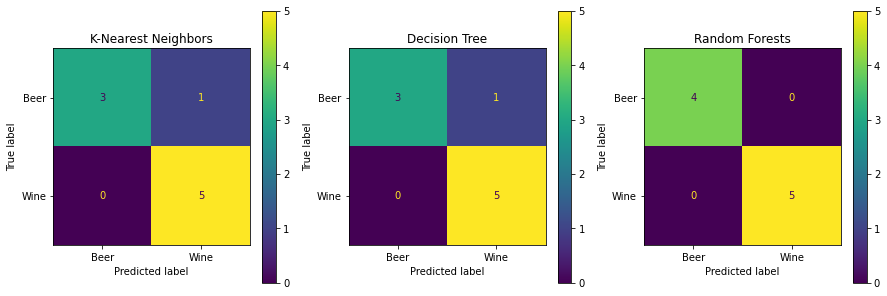

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Create a confusion matrix to visualize the performance of each model
fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].set_title("K-Nearest Neighbors")
knn_labels = [cls for cls in knn.classes_ if cls in knn_y_pred]
knn_cmatrix = confusion_matrix(y_test, knn_y_pred)
knn_display = ConfusionMatrixDisplay(confusion_matrix=knn_cmatrix, display_labels=knn.classes_)
knn_display.plot(ax=ax[0])

ax[1].set_title("Decision Tree")
dtree_labels = [cls for cls in dtree.classes_ if cls in dtree_y_pred]
dtree_cmatrix = confusion_matrix(y_test, dtree_y_pred)
dtree_display = ConfusionMatrixDisplay(confusion_matrix=dtree_cmatrix, display_labels=dtree.classes_)
dtree_display.plot(ax=ax[1])

ax[2].set_title("Random Forests")
rfor_labels = [cls for cls in rfor.classes_ if cls in rfor_y_pred]
rfor_cmatrix = confusion_matrix(y_test, rfor_y_pred)
rfor_display = ConfusionMatrixDisplay(confusion_matrix=rfor_cmatrix, display_labels=rfor.classes_)
rfor_display.plot(ax=ax[2])

plt.draw()

## Feature Importance ##

Most tree-based ML algorithms allow you to lookup the relative importance of each feature. This information may allow you to remove features that have little predictive power in order to simplify your model.

Our Random Forest classifier used all three features with Green being the best feature. We'll go ahead and leave the features as they are. Notice that the Decision Tree classifier completely ignores the `Red` feature, which could be removed if we were continuing with its model.

In [8]:
class_labels = [cls for cls in rfor.classes_ if cls in rfor_y_pred]
feature_names = list(X.columns)
importance_vals = rfor.feature_importances_

print(f"Class Labels: {class_labels}")
print(f"Features:     {feature_names}")

coef_df = pd.DataFrame(zip(feature_names, abs(importance_vals)), columns=["Feature", "Coefficient"])
coef_df.sort_values("Coefficient").reset_index(drop=True)             

Class Labels: ['Beer', 'Wine']
Features:     ['Red', 'Green', 'Blue']


,Feature,Coefficient
0,Blue,0.127481
1,Red,0.273468
2,Green,0.599050


In [9]:
class_labels = [cls for cls in dtree.classes_ if cls in dtree_y_pred]
feature_names = list(X.columns)
importance_vals = dtree.feature_importances_

print(f"Class Labels: {class_labels}")
print(f"Features:     {feature_names}")

coef_df = pd.DataFrame(zip(feature_names, abs(importance_vals)), columns=["Feature", "Coefficient"])
coef_df.sort_values("Coefficient").reset_index(drop=True)

Class Labels: ['Beer', 'Wine']
Features:     ['Red', 'Green', 'Blue']


,Feature,Coefficient
0,Red,0.000000
1,Blue,0.169122
2,Green,0.830878


In [10]:
# Note: Install graphviz through Anaconda Navigator using "graphviz" and "python-graphviz"... I struggled on macos
import pygraphviz as graphviz
from sklearn.tree import export_graphviz

gdata = export_graphviz(dtree, feature_names=feature_names,  class_names=class_labels,  filled=True, rounded=True)
gplot = graphviz.Source(gdata)
# Save the file to disk with: graph.render("Filename")
gplot

ModuleNotFoundError: No module named 'pygraphviz'

In [11]:
tree = rfor.estimators_[0]
gdata = export_graphviz(tree , feature_names=feature_names,  class_names=class_labels,  filled=True, rounded=True)
gplot = graphviz.Source(gdata)
gplot

NameError: name 'export_graphviz' is not defined

## Overfitting ##

How did the Random Forests model achieve perfect accuracy? Perhaps it was the ideal model for this dataset and we tuned it perfectly. Or perhaps we overfit the model and it would perform worse on additional real-life data. Without Marius and the waterpolo team feeding us new input, we'll never know for sure.



Decision Trees are prone to overfitting. They are created as part of a *greedy algorithm* that attempts to maximumize gain at each step of the algorithm. The problem is that short-term gains can sometimes lead to long-term problems such as overfitting. One of the goals of the Random Forests algorithm is to mitigate these greedy decisions by aggregating many many trees. But without additional data, we won't know the answer.

## Prototyping the Model ##


In [12]:
demo_df = pd.DataFrame(data=[{'Red':255, 'Green':248, 'Blue':151, 'Alochol(%)':5, 'Type':'Beer'},
                             {'Red':250, 'Green':233, 'Blue':111, 'Alochol(%)':5.5, 'Type':'Beer'},
                             {'Red':166, 'Green':63, 'Blue':42, 'Alochol(%)':5.5, 'Type':'Beer'},
                             {'Red':108, 'Green':30, 'Blue':10, 'Alochol(%)':12.5, 'Type':'Wine'},
                             {'Red':203, 'Green':30, 'Blue':12, 'Alochol(%)':12, 'Type':'Wine'},
                             {'Red':136, 'Green':15, 'Blue':3, 'Alochol(%)':13, 'Type':'Wine'}])

demo_X = demo_df[["Red", "Green", "Blue"]]
demo_y = demo_df["Type"]

# Fit for the KNN model
demo_X_scaled = scaler.transform(demo_X)

# Make predictions and quickly show the results
knn_demo = knn.predict(demo_X_scaled)
dtree_demo = dtree.predict(demo_X)
rfor_demo = rfor.predict(demo_X)
pd.DataFrame(data=zip(demo_y, knn_demo, dtree_demo, rfor_demo), 
             columns=["Actual", "KNN", "D-Tree", "R-Forest"])

,Actual,KNN,D-Tree,R-Forest
0,Beer,Beer,Wine,Beer
1,Beer,Beer,Wine,Beer
2,Beer,Wine,Wine,Wine
3,Wine,Wine,Wine,Wine
4,Wine,Wine,Wine,Wine
5,Wine,Wine,Wine,Wine


In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

# If we are going to categorical labels with precision or recall, we must set the positive label.
custom_scorer = make_scorer(recall_score, pos_label='Beer')


# K-Nearest Neighbors

k_value = range(3,7)
weights = ['distance', 'uniform']
algorithm = ['ball_tree', 'kd_tree', 'brute']
knn_hparms = dict(n_neighbors=k_value, weights=weights, algorithm=algorithm)

knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, knn_hparms, scoring=custom_scorer)


# Decision Tree

criterion = ['entropy', 'gini']
splitter = ['best', 'random']
dtree_hparms = dict(criterion=criterion, splitter=splitter)

dtree = DecisionTreeClassifier(random_state=1, max_depth=100)
dtree_gs = GridSearchCV(dtree, dtree_hparms, scoring=custom_scorer)


# Random Forests

n_estimators = list(range(50, 200, 50))
criterion = ['entropy', 'gini']
oob_score = [True, False]
rfor_hparms = dict(n_estimators=n_estimators, criterion=criterion, oob_score=oob_score)

rfor = RandomForestClassifier(random_state=1)
rfor_gs = GridSearchCV(rfor, rfor_hparms, scoring=custom_scorer)

In [14]:
# Run the search and show the results

knn_best = knn_gs.fit(X_train_scaled, y_train)
knn_pred = knn_best.predict(demo_X_scaled)
print("K-Nearest Neighbors")
print('Best K-Value:  ', knn_best.best_estimator_.get_params()['n_neighbors'])
print('Best Weight:   ', knn_best.best_estimator_.get_params()['weights'])
print('Best Algorithm:', knn_best.best_estimator_.get_params()["algorithm"])
print()
print(classification_report(demo_y, knn_pred, zero_division=1))

K-Nearest Neighbors
Best K-Value:   3
Best Weight:    distance
Best Algorithm: ball_tree

              precision    recall  f1-score   support

        Beer       1.00      0.67      0.80         3
        Wine       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [15]:
dtree_best = dtree_gs.fit(X_train, y_train)
dtree_pred = dtree_best.predict(demo_X)
print("Decision Tree")
print('Best Criterion:', dtree_best.best_estimator_.get_params()['criterion'])
print('Best Splitter: ', dtree_best.best_estimator_.get_params()['splitter'])
print()
print(classification_report(demo_y, dtree_pred, zero_division=1))

Decision Tree
Best Criterion: entropy
Best Splitter:  best

              precision    recall  f1-score   support

        Beer       1.00      0.00      0.00         3
        Wine       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.75      0.50      0.33         6
weighted avg       0.75      0.50      0.33         6



In [16]:
rfor_best = rfor_gs.fit(X, y)
rfor_pred = rfor_best.predict(demo_X)
print("Random Forest")
print('Best Estimators:', rfor_best.best_estimator_.get_params()['n_estimators'])
print('Best Criterion: ', rfor_best.best_estimator_.get_params()['criterion'])
print('Best OOB Score: ', rfor_best.best_estimator_.get_params()["oob_score"])
print()
print(classification_report(demo_y, rfor_pred, zero_division=1))

Random Forest
Best Estimators: 100
Best Criterion:  entropy
Best OOB Score:  True

              precision    recall  f1-score   support

        Beer       1.00      0.67      0.80         3
        Wine       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



## Exercise ##

There is a popular dataset used for ML competitions that comes from historic records about the passangers on the Titanic. The [raw data](https://www.encyclopedia-titanica.org/explorer/) is available for perusal at Encyclopedia Titanica and there are many CSV data dumps available across the internet. Mundane fact of the day: James Cameron's film *Titanic* was released when I was in high school and was hugely popular although I've never seen the film (at that point in my life, I only watched movies with explosions/fighting and *Titanic* was advertised more as a romance than an adventure).

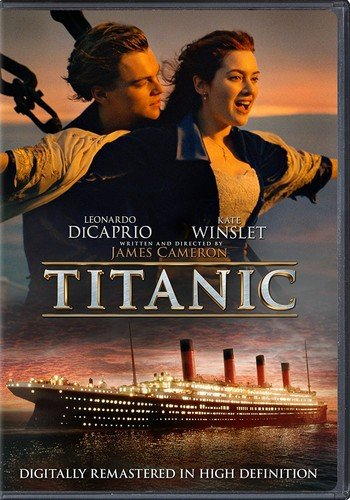

The dataset for this assignment came from an ongoing [Kaggle competition](https://www.kaggle.com/c/titanic/data) but has been slightly modified for this assignment. As I understand it, all of the people listed in `titanic_dataset.csv` were truly passangers on the ship and you will use their data *both* for training and for testing (this file is identical to Kaggle's `train.csv`). The second data file, `titanic_predictions.csv` contains fictitious passengers whose "true" outcome on the ship is only known to Kaggle (this file is called `test.csv` on Kaggle's website).
* You are welcome to read what other contestants have posted about the Titanic Competition.
* The Kaggle competition is ongoing and you are welcome to submit an entry. To enter the competition you can use the exact same model that you create for this homework assignment but you will need to change the output to fit their standards. ***There is 5 points extra credit for submitting an entry. Please post your score when you submit your assignment.***

Your job is to create a classifier that will predict whether a passanger survived the sinking of the Titanic based on their age, sex, ticket class, and other similar information. You must start with the features included in the CSV data files but you can drop, scale, or process new features as long as they are statistically sound. Here are the original features:

|Feature|Description|
|:------|:----------|
|PassengerId|Just a unique number identifying each passenger|
|Survived|Labels that determine fate of this passenger (0=Perished, 1=Survived)|
|Pclass|Ticket Class (1=1st class, 2=2nd class, 3=3rd class)|
|Name|Basically what you would expect (string)|
|Sex|male or female (string)|
|Age|an integer|
|SibSp|The number of siblings and/or spouses aboard the ship (int)|
|Parch|Number of parents and/or children aboard the ship (int)|
|Ticket|The unique ID of their ticket (string)|
|Fare|How much the person paid for their ticket (float)|
|Cabin|Cabin number|
|Embarked|Where this person came aboard (C=Cherbourg, Q=Queenstown, S=Southampton)|

***Please submit a python file (.py) for this assignment.***

Turn in a python module that will tell whether an arbitrary passenger would have survived or perished during the sinking of the Titanic. Users of your program submit a CSV file containing a group ficticious passenger and your program will report whether each person Survived or Perished. The CSV file should be passed as a command line parameter (`titanic_predictions.csv`).